In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
f = open("mnist_test_10.csv", 'r')
m_test = f.readlines()
f.close()

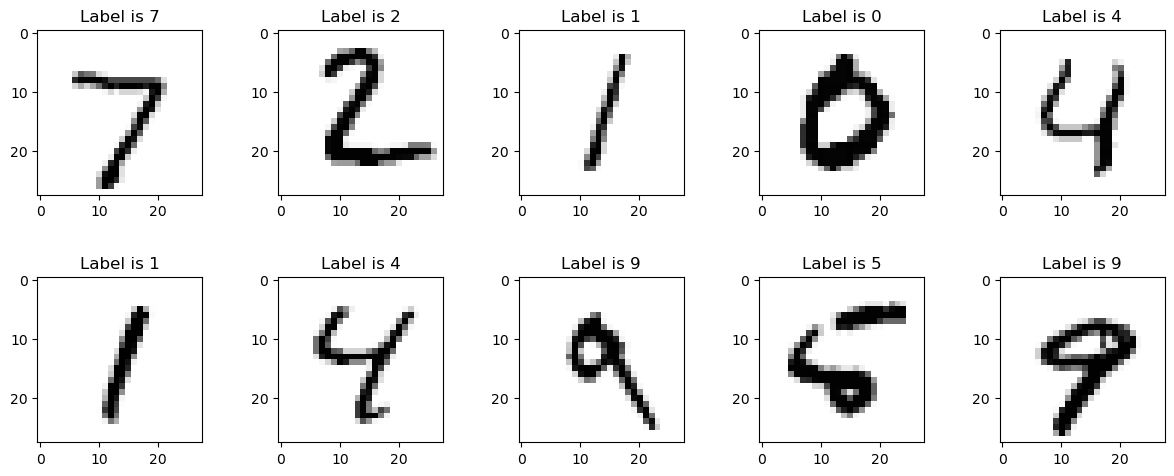

In [ ]:
# compute the matrix with the test set
import matplotlib.pylab as plt
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_test = len(m_test)
row_test= ncol_img*nrow_img
test_array = np.zeros( (row_test,col_test) )
test_lab = np.zeros((row_test,1))
ik=0
for line in m_test:
    lab_img = line.split(',')
    imarray = np.asfarray(lab_img[1:]).reshape((ncol_img,nrow_img))
    test_array[:,ik] = imarray.reshape(row_test)
    test_lab[ik] = np.asarray(lab_img[0])
    ik = ik+1
    plt.subplot(5,5,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label is " + lab_img[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    pass

In [ ]:
f = open("mnist_train_100.csv", 'r')
m_train = f.readlines()
f.close()

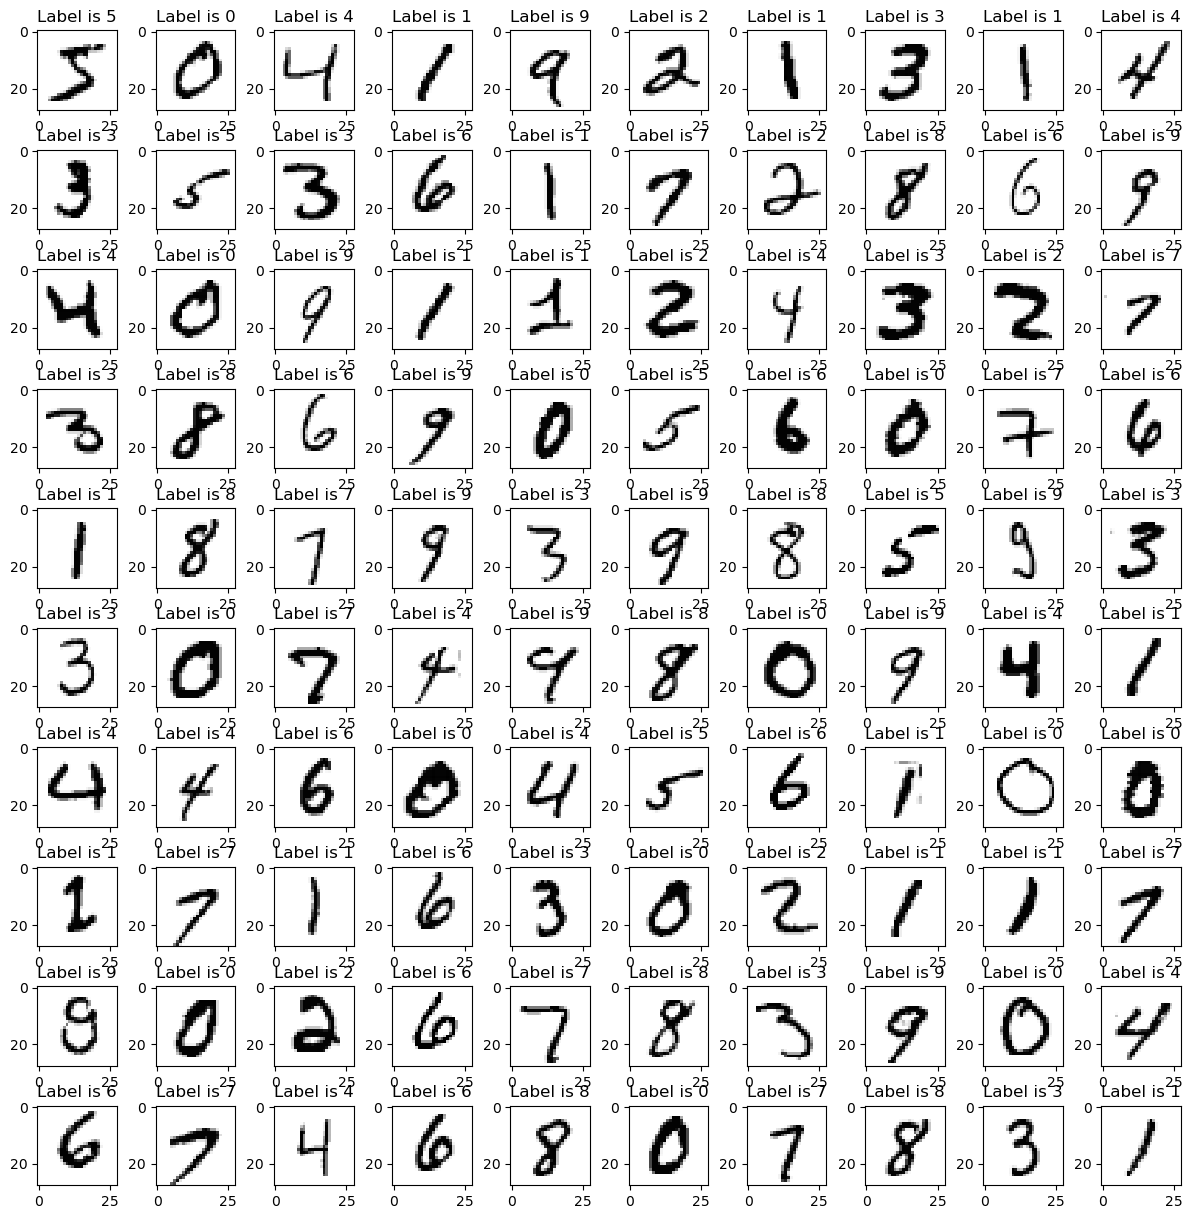

In [ ]:
# Compute the matrix with the train set
import matplotlib.pylab as plt
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_train = len(m_train)
row_train= ncol_img*nrow_img
train_array = np.zeros( (row_train,col_train) )
train_lab = np.zeros((row_train,1))
ik = 0
for line in m_train:
    lab_img = line.split(',')
    imarray = np.asfarray(lab_img[1:]).reshape((28,28))
    train_array[:,ik] = imarray.reshape(row_train)
    train_lab[ik] = np.asarray(lab_img[0])
    ik = ik+1
    plt.subplot(10,10,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label is " + lab_img[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    pass

- Compute the mean-image of the training images and subtract it from all the other images, denote the obtained matrix by ``AM``. Since ``AM`` columns have mean different from zero, make sure to center the data and name the new matrix ``AMC``. Then apply the SVD to ``AMC``  by using ``scipy.linalg.svd`` using ``full_matrices = False``.

Choose a $k$ value and select a subspace of the range of ``AMC``having dimension $k$ by suitable selecting an orthogonal basis.

For each digit in the training-set compute its class, that is the mean of the coordinates of the projection in the selected subspace. Determine to which class every digit of the test-set belongs to by computing the minimal 2-norm distance.

- Check and compare all the studied techniques to find the minimal value of $k$, number of principal components that are useful to classify the digit.

- Classify all the digits in the testset and compute the confusion matrix. That is the matrix where, for each digit i, the element of index i,j contains the number of observations known to be in group i and predicted to be in group j. Use ``sklearn.metrics.confusion_matrix`` and compute also  the classification report using ``sklearn.metrics.classification_report``.

In [ ]:
AM = train_array - np.outer(np.mean(train_array, axis=1), np.ones(100))
AMC = AM - np.mean(AM, axis=0)

In [ ]:
#Singular Value Decomposition
import scipy
U, S, VT = scipy.linalg.svd(AMC, full_matrices = False) #economy SVD

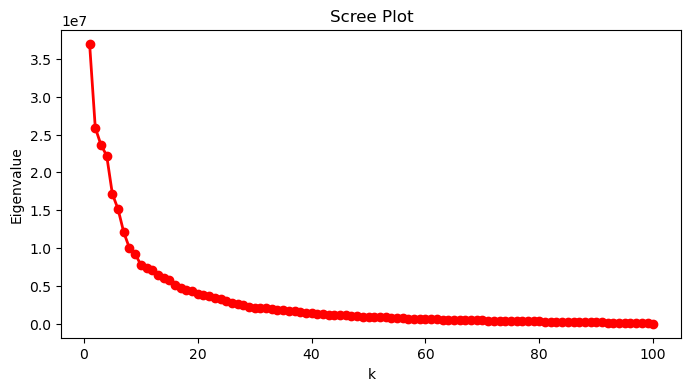

In [ ]:
#Techniques to find the minimal value of k:
r = len(S)

#1) Scree plot
eigenvalues = S**2
figure = plt.figure(figsize=(8,4))
singular_values = np.arange(len(eigenvalues)) + 1
plt.plot(singular_values, eigenvalues, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('k')
plt.ylabel('Eigenvalue')
plt.show()

k with cumulative percentage of total variation: 23


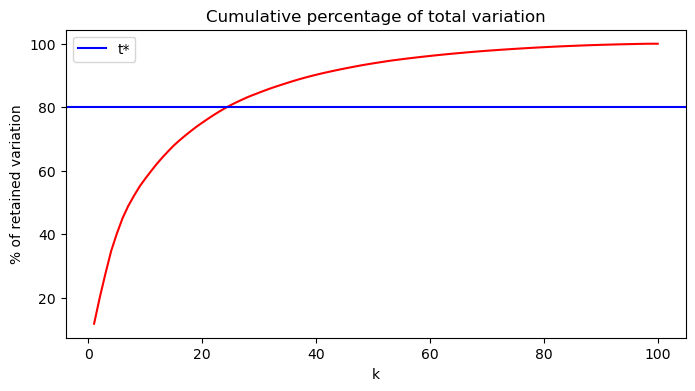

In [ ]:
#2) Cumulative percentage of total variation
#Choose k such that tk > t_star
t_star = 0.8
tk = np.cumsum(S**2)/np.sum(S**2)

k_cptv = np.argmax(tk > t_star) #Index of first value in tk that is greater than t_star
print('k with cumulative percentage of total variation:', k_cptv-1)

#Plot
figure = plt.figure(figsize=(8,4))
plt.plot(singular_values, tk*100, 'r-')
plt.axhline(y = t_star*100, color = 'b', linestyle = '-', label='t*')
plt.legend(loc="upper left")
plt.title('Cumulative percentage of total variation')
plt.xlabel('k')
plt.ylabel('% of retained variation')
plt.show()

k with Kaiser rule: 23


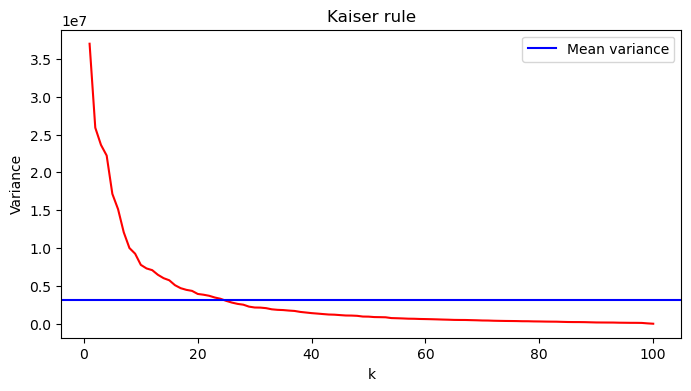

In [ ]:
#3) Kaiser rule
#Retain the singular values whose variance σk^2 exceeds the mean variance
k_kr = np.argmax(S**2 <= np.mean(S**2))
print('k with Kaiser rule:', k_kr - 1)

#Plot
figure = plt.figure(figsize=(8,4))
plt.plot(singular_values, S**2, 'r-')
plt.axhline(y = np.mean(S**2), color = 'b', linestyle = '-', label='Mean variance')
plt.legend(loc="upper right")
plt.title('Kaiser rule')
plt.xlabel('k')
plt.ylabel('Variance')
plt.show()

In [ ]:
fk = S**2/np.sum(S**2)
E = -1/np.log(r)*np.sum(fk*np.log(fk))
k_entropy = int(np.floor(r * t_star * E))
print('k to retain 80% entropy:', k_entropy)

k to retain 80% entropy: 62


k with Eckhart-Young: 23


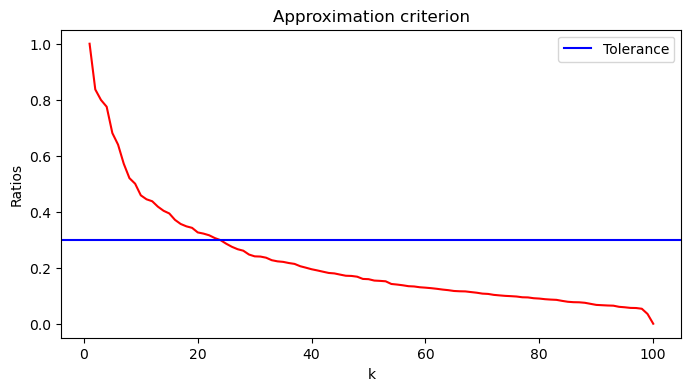

In [ ]:
#5) Approximation (Eckhart-Young Theorem)
#Choose k such that ||A - Ak||2 <= tol
tol = 0.3
ratios = S / S[0]
k_ey = np.argmax(ratios <= tol)

print('k with Eckhart-Young:', k_ey)

#Plot
figure = plt.figure(figsize=(8,4))
plt.plot(singular_values, ratios, 'r-')
plt.axhline(y = tol, color = 'b', linestyle = '-', label='Tolerance')
plt.legend(loc="upper right")
plt.title('Approximation criterion')
plt.xlabel('k')
plt.ylabel('Ratios')
plt.show()

In [ ]:
#Construct label arrays for the training and the test arrays
train_labels = train_lab[0:100]
test_labels = test_lab[0:10]

In [ ]:
#Construct digits dictionary
digits = {}

for i in range(10):
    digits[i] = []

for i in range(100):
    index = int(train_labels[i])
    digit_pixels = train_array[:,i]
    digits[index].append(digit_pixels)

In [ ]:
#Construct dictionary of digit coefficients
k = 22

digit_coefficients = {}

for i in range(0,10):
    digit_coefficients[i]=[]

for i in range(0,10):
    for j in range(len(digits[i])):
            digit = digits[i][j] - np.mean(train_array, axis=1)
            digit = digit - np.mean(digit)
            digit_coefficient = np.dot(U[:,:k].T, digit)
            digit_coefficients[i].append(digit_coefficient)
    digit_coefficients[i] = np.asarray(digit_coefficients[i])

In [ ]:
#Construct dictionary of digit classes
digit_classes = {}

for i in range(0, 10):
    digit_classes[i]= np.mean(digit_coefficients[i], axis=0)

In [ ]:
#Classification
predictions = np.zeros(shape=(10,1))

for i in range(10):
    digit = test_array[:,i] - np.mean(train_array, axis=1)
    digit = digit - np.mean(digit)
    digit_coefficient = np.dot(U[:,:k].T, digit)
    v = np.zeros((10,1))
    for j in range(10):
        v[j]= np.linalg.norm(digit_classes[j] - digit_coefficient)
    nclass = np.argmin(v)
    predictions[i] = nclass

In [ ]:
print(test_labels.T)
print(predictions.T)

[[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]]
[[7. 2. 1. 0. 4. 1. 9. 4. 4. 9.]]


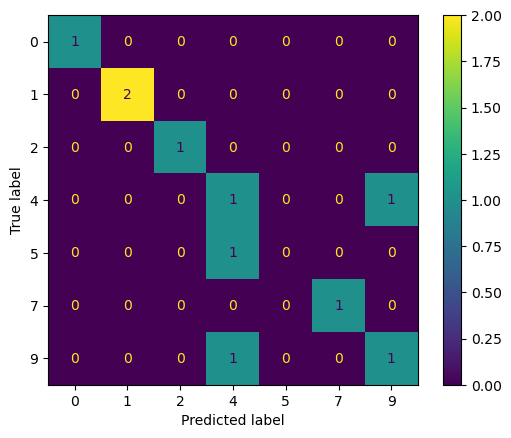

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_true = test_labels.astype(int)
y_pred = predictions.astype(int)

cm = confusion_matrix(y_true, y_pred)
labels = np.unique(y_true)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [ ]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       0.33      0.50      0.40         2
           7       1.00      1.00      1.00         1
           9       0.50      0.50      0.50         2

   micro avg       0.70      0.78      0.74         9
   macro avg       0.81      0.83      0.82         9
weighted avg       0.74      0.78      0.76         9

